In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


--2024-10-07 03:01:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2024-10-07 03:01:45 (12.2 MB/s) - ‘laptops.csv’ saved [298573/298573]



# Data Preparation

In [3]:
df=pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


```
Target Column Is Final Price (y)

```


**1.Data Cleaning**

In [4]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [5]:
#For Columns

df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
df.tail()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [7]:
#For Values

strings=list(df.dtypes[df.dtypes=="object"].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [8]:
for col in strings:
  df[col]=df[col].str.lower().str.replace(' ','_')

In [9]:
df.tail()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99
2159,razer_book_fhd+_intel_evo_core_i7-1165g7/16gb/...,refurbished,razer,book,intel_evo_core_i7,16,256,ssd,NaN,13.4,yes,1699.99


In [10]:
features=['ram',
'storage',
'screen',
] #All numerical features

# EDA

**1.General Info**

In [11]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
2160

status
['new' 'refurbished']
2

brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']
27

model
['expertbook' 'go' 'katana' '15s' 'crosshair']
121

cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['ssd' 'emmc' nan]
2

gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['no' 'yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



**1.Look at the final_price variable. Does it have a long tail?**

<Axes: xlabel='final_price', ylabel='Count'>

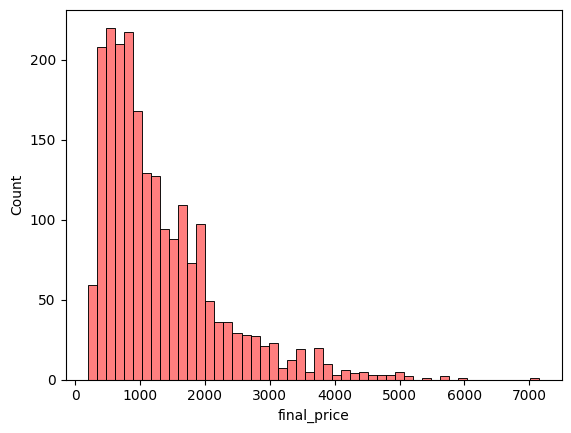

In [12]:
sns.histplot(df.final_price,color='red',alpha=0.5,bins=50)

In [13]:
#Yes it has a long tail distribution. A long-tailed distribution is characterized by a large number of occurrences far from the "head" or central part of the distribution.



<Axes: xlabel='final_price', ylabel='Count'>

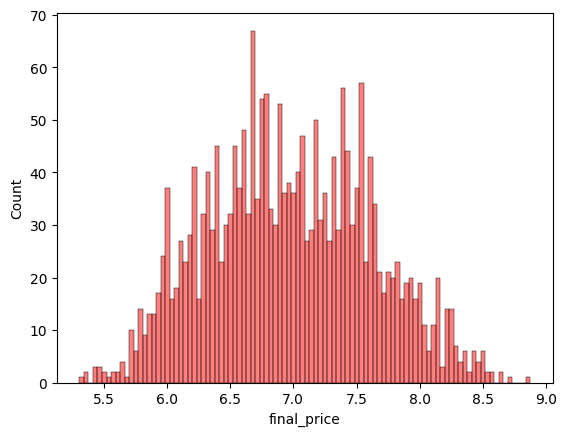

In [14]:
price_logs=np.log1p(df.final_price)
sns.histplot(price_logs,color='red',alpha=0.5,bins=100)

In [15]:
#Is this a normal distribution?

import numpy as np
import scipy.stats as stats

# Assuming your data is stored in a list called 'data'
data = price_logs

# Calculate the skewness coefficient using scipy.stats
skewness = stats.skew(data)

print("Skewness coefficient:", skewness)

Skewness coefficient: 0.11410277946944977


```
This code will output the skewness coefficient of the given data. If the value is close to 0, the distribution is approximately symmetric. A positive value indicates right-skewness, and a negative value indicates left-skewness.

```

Square Root Transformation to remove positive skewness:


In [16]:
price_logs= np.sqrt(price_logs)
data=price_logs
skewness = stats.skew(data)

print("Skewness coefficient:", skewness)


Skewness coefficient: 0.01658503486720721


In [17]:
#FORMULA FOR CALCULATING SKEWNESS

n = len(price_logs)  # Number of observations
mean = np.mean(price_logs)
std_dev = np.std(price_logs)
# Summation of cubed differences normalized by standard deviation
summation = 0
for i in price_logs:
    summation += ((i - mean) / std_dev) ** 3

# Formula for skewness (Pearson's skewness formula with the scaling factor)
skewness_manual = (n / ((n - 1) * (n - 2))) * summation

print(f"Skewness (manual calculation): {skewness_manual}")

Skewness (manual calculation): 0.016608094545805186


In [18]:
price_logs

,final_price
0,2.630153
1,2.388259
2,2.583028
3,2.662720
4,2.550940
...,...
2155,2.810938
2156,2.823616
2157,2.851635
2158,2.747750


<Axes: xlabel='final_price', ylabel='Count'>

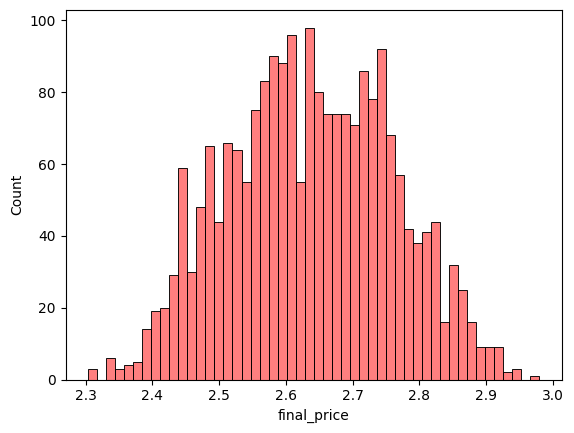

In [19]:
sns.histplot(price_logs,color='red',alpha=0.5,bins=50)

**2.There's one column with missing values. What is it?**

In [20]:
df.isnull().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


In [21]:
#2.What's the median (50% percentile) for variable 'ram'?

df['ram'].median() #Median ->first sort it in ascending/descending order then find the middle value 50% below it 50% abv it

16.0

Skewness

```
Values of skewness that are between -0.5 and +0.5 are often considered to show a distribution that is close to normal.

Interpretation of Skewness:

Skewness ≈ 0: Indicates a symmetric distribution, which is what you generally want for a normal distribution.
Skewness > 0 (positive skewness): Indicates a distribution where the right tail is longer or more spread out than the left tail.
Skewness < 0 (negative skewness): Indicates a distribution where the left tail is longer or more spread out than the right tail.

```

```
Perfect normal distribution: Skewness = 0
Slight right skewness: 0 < skewness < 0.5
Slight left skewness: -0.5 < skewness < 0

```

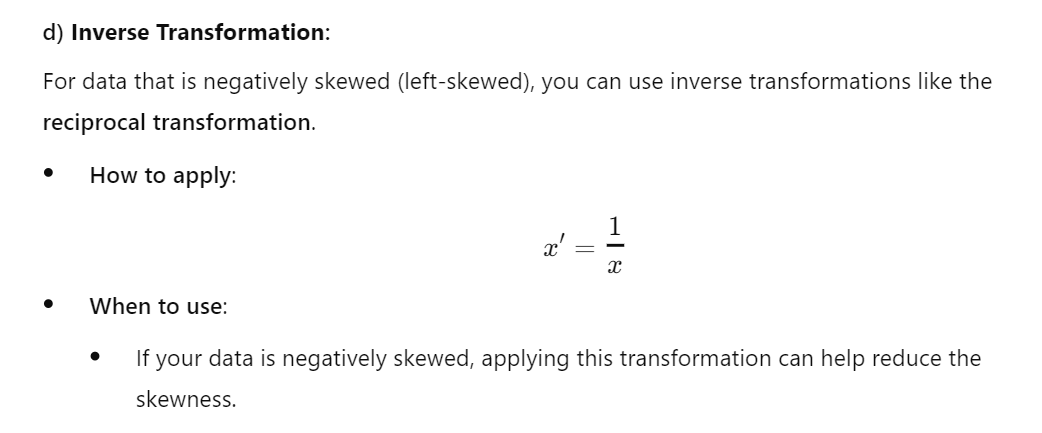



```
df['transformed'] = 1 / df['column_name']


```

# Setting Up Validation Framework (Train Val Test)

In [111]:
len(df)

2160

In [112]:
#Train=60% rest 20%

n=len(df)
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-(n_val+n_test) #0.2=20%

In [113]:
n,n_train+n_test+n_val

(2160, 2160)

**1.Shuffle the records**

In [114]:
index=np.arange(n)
index

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [115]:
np.random.seed(42)
np.random.shuffle(index)

In [116]:
#Creating train,val,test frameworks

df_train=df.iloc[index[:n_train]]
df_val=df.iloc[index[n_train:n_train+n_val]]
df_test=df.iloc[index[n_train+n_val:]]

In [117]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
668,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2073,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
1113,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
788,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


In [118]:
len(df_train),len(df_val),len(df_test)

(1296, 432, 432)

In [119]:
#Reset the indices of each dataframe

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [120]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


**2.To reduce long tail distribution in final_price apply log1p transformation + square root transformation**

In [121]:
y_train=df_train.final_price.values
y_val=df_val.final_price.values
y_test=df_test.final_price.values

y_train_log=np.log(y_train)
y_val_log=np.log(y_val)
y_test_log=np.log(y_test)

y_train_log_sq=np.sqrt(y_train_log)
y_val_log_sq=np.sqrt(y_val_log)
y_test_log_sq=np.sqrt(y_test_log)


In [122]:
y_train=y_train_log_sq
y_val=y_val_log_sq
y_test=y_test_log_sq

In [123]:
#Remove final_price column from the dataframes

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# FURTHER EDA

**1.Missing Values**

In [35]:
#We have two options: fill it with 0 or with the mean of this variable.



In [36]:
df_train=df_train[features]
df_val=df_val[features]
df_test=df_test[features]

In [37]:
df_train.isnull().sum()

,0
ram,0
storage,0
screen,3


In [38]:
#Fill Missing Values with 0

df_train_0=df_train.fillna(0)
df_val_0=df_val.fillna(0)
df_test_0=df_test.fillna(0)

In [39]:

#Fill with mean


df_train_1=df_train.fillna(np.mean(df_train['screen']))
df_val_1=df_val.fillna(np.mean(df_train['screen']))
df_test_1=df_test.fillna(np.mean(df_train['screen']))

# Linear Regression Model

```
Formula => X.w =y

X=feature matrix, w=weights vector , y =predictions vector

X^T.X.w=X^T.y
(X^T.X)^-1(X^T.X).w=(X^T.X)^-1.y
w=(X^T.X)^-1.y
```

In [40]:
df_train.head(3)

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0


**1.Prepare Feature Matrix X**

In [41]:
#Convert DataFrame to Feature Matrix

def Prepare_X(df):
  X=df.values
  return X


In [42]:
def Train_Linear_Regression(Xi,y):
  ones=np.ones(Xi.shape[0])
  Xi=np.column_stack([ones,Xi])

  #Linear Regression Normal Equation
  #---------------------------------
  X_Gram=Xi.T.dot(Xi)
  X_Gram_inv=np.linalg.inv(X_Gram)
  w_full=X_Gram_inv.dot(Xi.T).dot(y)
  #---------------------------------
  w0=w_full[0]
  w=w_full[1:]
  return w0,w


In [43]:
X_train_0=Prepare_X(df_train_0)
w0_zero,w_zero=Train_Linear_Regression(X_train_0,y_train)


In [44]:
w0_zero,w_zero

(2.5935097393157815, array([ 0.00490358,  0.00012524, -0.0070085 ]))

In [45]:
X_train_Mean=Prepare_X(df_train_1)
w0_mean,w_mean=Train_Linear_Regression(X_train_Mean,y_train)

In [46]:
w0_mean,w_mean

(2.6181411124979417, array([ 0.0049413 ,  0.00012639, -0.00870125]))

# RMSE

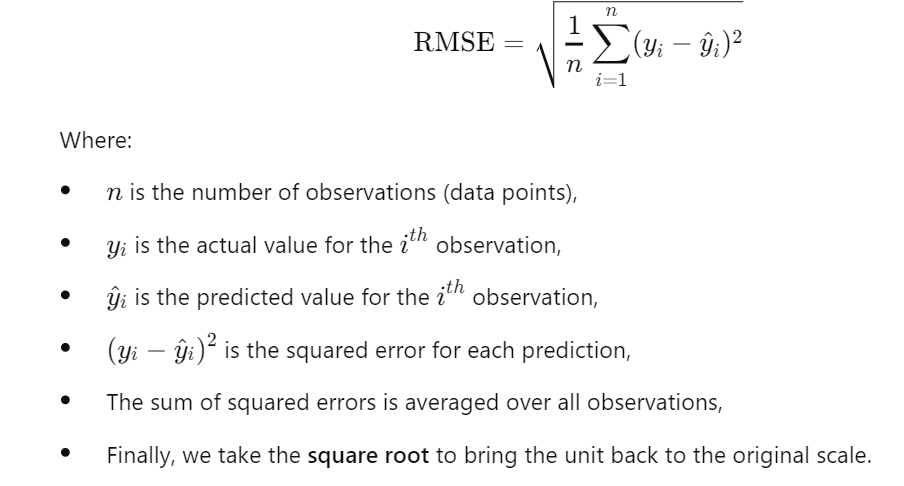

In [47]:
def RMSE(y_true, y_pred):
    # assert len(y_true) == len(y_pred)
    error=y_true-y_pred
    sq_error=error**2
    mse=sq_error.mean()
    res=np.sqrt(mse)
    return res


In [48]:
X_val_0=Prepare_X(df_val_0)
X_val_mean=Prepare_X(df_val_1)

In [49]:
y_val_0=w0_zero+X_val_0.dot(w_zero)
y_val_mean=w0_mean+X_val_mean.dot(w_mean)

In [50]:
y_val.shape

(432,)

In [51]:
y_val_0.shape

(432,)

In [52]:
round(RMSE(y_val,y_val_0),2)

0.08

In [53]:
round(RMSE(y_val,y_val_mean),2)

0.08

# Regularization + Final Model







```
Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

```

In [54]:
np.eye(3,1)

array([[1.],
       [0.],
       [0.]])

In [55]:
def Train_Linear_Regression(Xi,y,r):
  ones=np.ones(Xi.shape[0])
  X=np.column_stack([ones,Xi])

  XTX=X.T.dot(X)
  XTX=XTX+r*np.eye(XTX.shape[0])
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [56]:
X_train=Prepare_X(df_train_0)
w0,w=Train_Linear_Regression(X_train,y_train,r=0.01)

X_val=Prepare_X(df_val_0)
y_pred=w0+X_val.dot(w)
RMSE(y_val,y_pred)

0.0820638826198925

In [57]:
#Best RMSE

final_score=0;
optimal_r=0;

for i in [0, 0.01, 0.1, 1, 5, 10, 100] :
  X_train=Prepare_X(df_train_0)
  w0,w=Train_Linear_Regression(X_train,y_train,r=i)
  X_val=Prepare_X(df_val_0)
  y_pred=w0+X_val.dot(w)
  score=RMSE(y_pred,y_val)
  if(score<final_score or final_score==0):
    final_score=score
    optimal_r=i


  print(i,w0,score)

print()
print(final_score,optimal_r)

0 2.5935097393157815 0.08206827563040614
0.01 2.5911355714969395 0.0820638826198925
0.1 2.5699629192905613 0.08204804225342152
1 2.375901575865524 0.08383898074631069
5 1.7797820219943354 0.10751992366436287
10 1.356037984286243 0.13454146872885464
100 0.26449178909058846 0.21822048512919118

0.08204804225342152 0.1


In [142]:
#Best RMSE

final_score=0;
optimal_r=0;

for i in [0, 0.01, 0.1, 1, 5, 10, 100] :
  X_train=Prepare_X(df_train_0)
  w0,w=Train_Linear_Regression(X_train,y_train,r=i)
  X_val=Prepare_X(df_val_0)
  y_pred=w0+X_val.dot(w)
  score=RMSE(y_pred,y_val)
  if(score<final_score or final_score==0):
    final_score=score
    optimal_r=i


  print(i,w0,score)

print()
print(final_score,optimal_r)

0 2.5935097393157815 0.08206827563040614
0.01 2.5911355714969395 0.0820638826198925
0.1 2.5699629192905613 0.08204804225342152
1 2.375901575865524 0.08383898074631069
5 1.7797820219943354 0.10751992366436287
10 1.356037984286243 0.13454146872885464
100 0.26449178909058846 0.21822048512919118

0.08204804225342152 0.1


In [ ]:
df_shuffled = df1.sample(frac=1, random_state=seed).reset_index(drop=True)


  # Define the split points
train_size = int(0.6 * len(df_shuffled))  # 60% for training
val_size = int(0.2 * len(df_shuffled))    # 80% for validation

train_size+val_size

In [141]:
score_track=[None]*12

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,42]:
  # Shuffle the DataFrame with the current seed
  df1=df[features].copy()
  df_shuffled = df1.sample(frac=1, random_state=seed).reset_index(drop=True)


  # Define the split points
  train_size = int(0.6 * len(df_shuffled))  # 60% for training
  val_size = int(0.2 * len(df_shuffled))    # 80% for validation

  # Split the shuffled DataFrame into train, validation, and test sets
  df_train_new = df_shuffled.iloc[:train_size]  # First 60% goes to train
  df_val_new = df_shuffled.iloc[train_size:train_size+val_size]  # Next 20% goes to validation
  df_test_new = df_shuffled.iloc[train_size+val_size:]  # Last 20% goes to test


  # Getting respective feature matrices
  # X_train=np.array(Prepare_X(df_train_new))
  # X_val=np.array(Prepare_X(df_val_new))
  # X_test=np.array(Prepare_X(df_test_new))

  X_train=(Prepare_X(df_train_new))
  X_val=(Prepare_X(df_val_new))
  X_test=(Prepare_X(df_test_new))




  w0,w=Train_Linear_Regression(X_train,y_train,r=0.01)
  y_pred=w0+X_val.dot(w)
  score=RMSE(y_val,y_pred)
  score_track.append(score)
  print(seed,score)





0 0.12284152002898666
1 0.12281116077107951
2 0.12271537818309002
3 0.12264127578992332
4 0.12295810805767678
5 0.12331513047534981
6 0.12300687996358722
7 0.12369911698956018
8 0.1228024718864755
9 0.12266682908138697
42 0.049189442383959614


In [126]:
np.std(score_track)

0.0003145962288904313

In [ ]:
#Ideal low standard deviation+rmse

# Influence Of Seed

Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [89]:
def Train_Linear_Regression_Without_Reg(Xi,y):
  ones=np.ones(Xi.shape[0])
  X=np.column_stack([ones,Xi])

  XTX=X.T.dot(X)
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [90]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [100]:
def Prepare_X(df):
  df=df.fillna(0)
  X=df.values
  return X

In [92]:
Train_Linear_Regression

<function __main__.Train_Linear_Regression(Xi, y, r)>

```
How to fill missing values

First: Split your data into train, validation, and test sets.
Second: Use the training data to fill missing values.
Finally: Apply the same imputation technique (based on training data) to the validation and test sets to prevent data leakage.

Fill missing values in the test set, but only using information from the training set. The key principle is that you should not use the test set to inform your data preprocessing. This ensures the integrity of your test set and prevents data leakage.



```

In [99]:
features
features.append('final_price')

In [94]:

df.head(3)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.0
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.0
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.0


In [101]:
score_track=[None]*10

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  # Shuffle the DataFrame with the current seed
  df1=df[features].copy()
  df_shuffled = df1.sample(frac=1, random_state=seed).reset_index(drop=True)


  # Define the split points
  train_size = int(0.6 * len(df_shuffled))  # 60% for training
  val_size = int(0.8 * len(df_shuffled))    # 80% for validation

  # Split the shuffled DataFrame into train, validation, and test sets
  df_train_new = df_shuffled.iloc[:train_size]  # First 60% goes to train
  df_val_new = df_shuffled.iloc[train_size:val_size]  # Next 20% goes to validation
  df_test_new = df_shuffled.iloc[val_size:]  # Last 20% goes to test

  y_train=df_train_new['final_price'].values
  y_val=df_val_new['final_price'].values
  y_test=df_test_new['final_price'].values

  del df_train_new['final_price']
  del df_val_new['final_price']
  del df_test_new['final_price']

  # Getting respective feature matrices
  # X_train=np.array(Prepare_X(df_train_new))
  # X_val=np.array(Prepare_X(df_val_new))
  # X_test=np.array(Prepare_X(df_test_new))

  X_train=(Prepare_X(df_train_new))
  X_val=(Prepare_X(df_val_new))
  X_test=(Prepare_X(df_test_new))




  w0,w=Train_Linear_Regression_Without_Reg(X_train,y_train)
  y_pred=w0+X_val.dot(w)
  score=RMSE(y_val,y_pred)
  score_track[seed]=score
  print(seed,score)





0 565.4520868770992
1 636.7985423056716
2 588.9558697907979
3 597.8148920012542
4 571.9627915111046
5 573.2383256618959
6 647.3438328407311
7 550.4398184485875
8 587.333503616987
9 576.1017929433077


In [105]:
std=np.std(score_track)
print(round(std,3))

29.176


In [103]:
#NOTE WE DO NOT APPLY ANY TECHNIQUES FOR LONG TAIL DISTRIBUTION OR FOR REGULARIZATION

```
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

What is a good standard deviation depends on our problem statement

```

# Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [108]:
df1=df[features].copy()
df_shuffled = df1.sample(frac=1, random_state=9).reset_index(drop=True)


# Define the split points
train_size = int(0.6 * len(df_shuffled))  # 60% for training
val_size = int(0.8 * len(df_shuffled))    # 80% for validation

# Split the shuffled DataFrame into train, validation, and test sets
df_train_new = df_shuffled.iloc[:train_size]  # First 60% goes to train
df_val_new = df_shuffled.iloc[train_size:val_size]  # Next 20% goes to validation
df_test_new = df_shuffled.iloc[val_size:]  # Last 20% goes to test

df_train_val_combined = pd.concat([df_train_new, df_val_new], axis=0) #axis =0 for row wise concatenation


y_train=df_train_val_combined['final_price'].values
y_test=df_test_new['final_price'].values

del df_train_val_combined['final_price']
del df_test_new['final_price']

# Getting respective feature matrices
# X_train=np.array(Prepare_X(df_train_new))
# X_val=np.array(Prepare_X(df_val_new))
# X_test=np.array(Prepare_X(df_test_new))

X_train=(Prepare_X(df_train_val_combined))
X_test=(Prepare_X(df_test_new))




w0,w=Train_Linear_Regression(X_train,y_train,r=0.001)
y_pred=w0+X_test.dot(w)
score=RMSE(y_test,y_pred)
score_track[seed]=score
print(seed,score)





9 608.6099822049601
